# Descriptive Analysis
## Prevalence of Emojis

#### Initialization

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib, mplcairo
print('Default backend: ' + matplotlib.get_backend()) 
#matplotlib.use("module://mplcairo.macosx")
#print('Backend is now ' + matplotlib.get_backend())
sns.set()

pd.set_option('display.float_format', lambda x: '%.5f' % x)

path_root = "/Users/atanaltay/Documents/Research/inwork/marketing_emotions/codes/data/all_marketing_data/"
groupsAndCountsPath = path_root + "emoticon_analysis/tr_emoticon_groups_and_counts.csv"
emojisPath = path_root + "emoticon_analysis/emojis.csv"
path_in = path_root+ "tr_emoanalysis.parquet"
path_in_en= path_root + "en_emoanalysis.parquet"
groupsAndCountsDfEn = pd.read_csv(path_root + "emoticon_analysis/en_emoticon_groups_and_counts.csv")
groupsAndCountsDfTr = pd.read_csv(groupsAndCountsPath)
emojisdf = pd.read_csv(emojisPath)

cscPathTr = path_root + "emoticon_analysis/count_matrices/tr/csc_count.npz"
featuresPathTr = path_root + "emoticon_analysis/count_matrices/tr/feature_names.npy"

cscPathEn = path_root + "emoticon_analysis/count_matrices/en/csc_count.npz"
featuresPathEn = path_root + "emoticon_analysis/count_matrices/en/feature_names.npy"

cscCountsMatrixTr = scipy.sparse.load_npz(cscPathTr)
featureNamesArrayTr = np.load(featuresPathTr,allow_pickle=True)

cscCountsMatrixEn = scipy.sparse.load_npz(cscPathEn)
featureNamesArrayEn = np.load(featuresPathEn,allow_pickle=True)

dfTr = pd.read_parquet(path_in,columns=["id","created_at","company","type","industry","gender"])
dfEn = pd.read_parquet(path_in_en,columns=["id","created_at","company","type","industry","gender"])

sumsTr = cscCountsMatrixTr.sum(axis=1)
sumsTr = np.squeeze(np.asarray(sumsTr))
dfTr['emoji_count'] = sumsTr
sumsEn = cscCountsMatrixEn.sum(axis=1)
sumsEn = np.squeeze(np.asarray(sumsEn))
dfEn['emoji_count'] = sumsEn
dfTr['contains_emoji'] = np.where(dfTr.emoji_count>0,1,0)
dfEn['contains_emoji'] = np.where(dfEn.emoji_count>0,1,0)



Default backend: module://matplotlib_inline.backend_inline


In [2]:
dfTr

,id,created_at,company,type,industry,gender,emoji_count,contains_emoji
__null_dask_index__,,,,,,,,
0,1208077577325305863,2019-12-20T17:31:54.000Z,cocacola,reply,Food & Beverage,Uni,0,0
1,1208075161360048128,2019-12-20T17:22:18.000Z,cocacola,reply,Food & Beverage,Uni,0,0
2,1208072166463463424,2019-12-20T17:10:24.000Z,cocacola,reply,Food & Beverage,Uni,1,1
3,1208071864763011074,2019-12-20T17:09:12.000Z,cocacola,reply,Food & Beverage,Uni,0,0
4,1208071140863873025,2019-12-20T17:06:19.000Z,cocacola,reply,Food & Beverage,Uni,0,0
...,...,...,...,...,...,...,...,...
735454,684678437391446016,2016-01-06T10:10:34.000Z,yvesroche,post,Personal Care,Female,0,0
735455,684672119200964608,2016-01-06T09:45:28.000Z,yvesroche,post,Personal Care,Female,0,0
735456,684307655259746304,2016-01-05T09:37:13.000Z,yvesroche,post,Personal Care,Female,0,0


#### Comparing Proportions

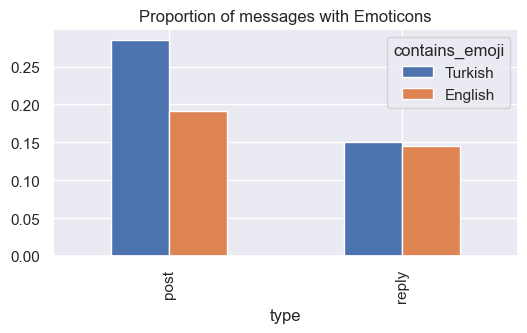

In [2]:
crossTr = pd.crosstab(dfTr.type,dfTr.contains_emoji,normalize="index").rename(columns={0:"None",1:"One or more"})
crossEn = pd.crosstab(dfEn.type,dfEn.contains_emoji,normalize="index").rename(columns={0:"None",1:"One or more"})


crossTr['type_'] = crossTr.index
crossEn['type_'] = crossEn.index
dfCrossToPlot = crossEn[['One or more','type_']].merge(crossTr[['One or more','type_']],right_index=True,left_on='type_')
dfCrossToPlot=dfCrossToPlot.rename(columns={'One or more_x':'English','One or more_y':'Turkish'})[['English','Turkish']]
dfCrossToPlot = dfCrossToPlot[['Turkish','English']]

fig,ax = plt.subplots(figsize=(6,3),sharey=True)
fig.set_dpi(100)

dfCrossToPlot.sort_values(by=['type','Turkish']).plot.bar(ax=ax)
plt.title('Proportion of messages with Emoticons')
plt.show()

In [2]:
dfTr.contains_emoji.value_counts()/len(dfTr)

0   0.80432
1   0.19568
Name: contains_emoji, dtype: float64

In [4]:
dfTr.emoji_count.value_counts()/len(dfTr)

0     0.80432
1     0.14537
2     0.02736
3     0.01394
4     0.00450
        ...  
120   0.00000
131   0.00000
114   0.00000
112   0.00000
56    0.00000
Name: emoji_count, Length: 76, dtype: float64

In [6]:
dfTr[dfTr.type=='reply'].contains_emoji.value_counts()/len(dfTr[dfTr.type=='reply'])

0   0.84894
1   0.15106
Name: contains_emoji, dtype: float64

In [7]:
dfTr[dfTr.type=='post'].contains_emoji.value_counts()/len(dfTr[dfTr.type=='post'])

0   0.71521
1   0.28479
Name: contains_emoji, dtype: float64

In [8]:
dfEn[dfEn.type=='post'].contains_emoji.value_counts()/len(dfEn[dfEn.type=='post'])

0   0.80835
1   0.19165
Name: contains_emoji, dtype: float64

In [9]:
dfEn[dfEn.type=='reply'].contains_emoji.value_counts()/len(dfEn[dfEn.type=='reply'])

0   0.85431
1   0.14569
Name: contains_emoji, dtype: float64

In [3]:
from statsmodels.stats.proportion import proportions_ztest

countEn = len(dfEn[dfEn['emoji_count']>0])
nobsEn = len(dfEn)

countTr = len(dfTr[dfTr['emoji_count']>0])
nobsTr = len(dfTr)


stat, pval = proportions_ztest(np.array([countEn,countTr]), nobs=np.array([nobsEn,nobsTr]))

print("stat:",stat, " p-val:", pval)

stat: -76.78535483936143  p-val: 0.0


In [3]:
# posts tests for proportions
from statsmodels.stats.proportion import proportions_ztest

crossTrCnt = pd.crosstab(dfTr.type,dfTr.contains_emoji).rename(columns={0:"None",1:"One or more"})
crossEnCnt = pd.crosstab(dfEn.type,dfEn.contains_emoji).rename(columns={0:"None",1:"One or more"})


countPostEn = crossEnCnt.loc['post','One or more']
nobsPostEn = crossEnCnt.loc['post'].sum()

countPostTr = crossTrCnt.loc['post','One or more']
nobsPostTr = crossTrCnt.loc['post'].sum()


stat, pval = proportions_ztest(np.array([countPostEn,countPostTr]), nobs=np.array([nobsPostEn,nobsPostTr]))

print("post stat:",stat, "post p-val:", pval)

post stat: -110.57833046934763 post p-val: 0.0


In [5]:
# replies tests for proportions
from statsmodels.stats.proportion import proportions_ztest
countReplyEn = crossEnCnt.loc['reply','One or more']
nobsReplyEn = crossEnCnt.loc['reply'].sum()

countReplyTr = crossTrCnt.loc['reply','One or more']
nobsReplyTr = crossTrCnt.loc['reply'].sum()


stat, pval = proportions_ztest(np.array([countReplyEn,countReplyTr]), nobs=np.array([nobsReplyEn,nobsReplyTr]))

print("reply stat:",stat, "reply p-val:", pval)

reply stat: -10.17568565767439 reply p-val: 2.5460052409079967e-24


#### Overall

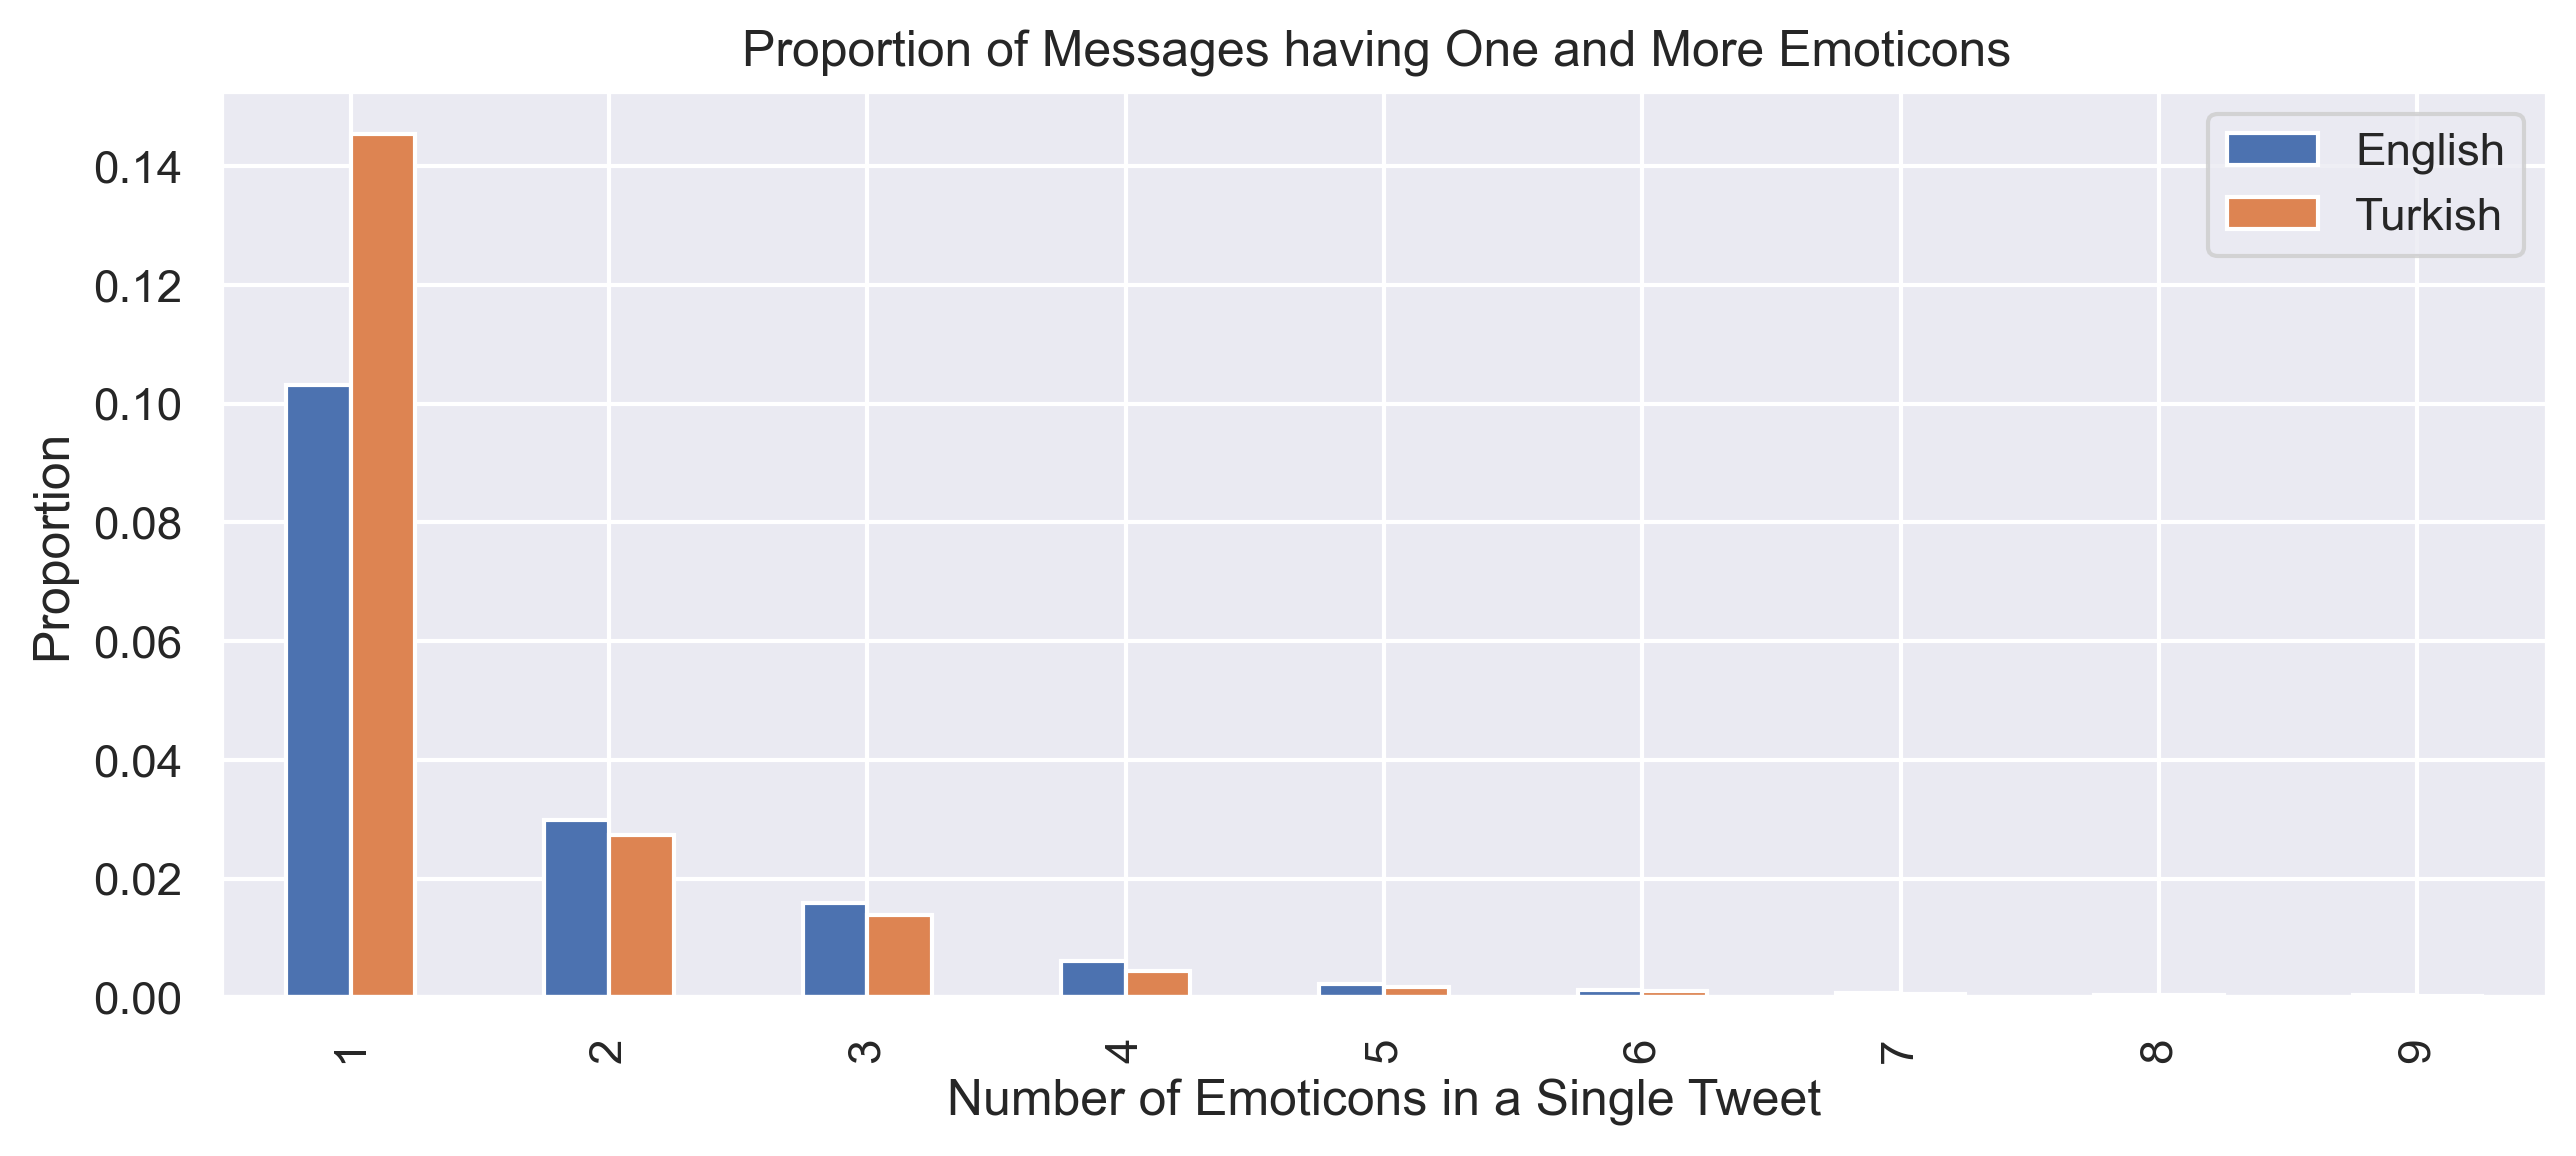

In [10]:
fig,ax = plt.subplots(figsize=(10,4))
fig.set_dpi(300)


serEn = dfEn.emoji_count.value_counts()
serEn = serEn/serEn.sum()
serTr = dfTr.emoji_count.value_counts()
serTr = serTr/serTr.sum()

dfToPlot = pd.DataFrame({'English':serEn,'Turkish':serTr})

dfToPlot[(dfToPlot.index>0) & (dfToPlot.index<10)].plot.bar(ax=ax)

#plt.tight_layout()
plt.title('Proportion of Messages having One and More Emoticons ')
plt.ylabel('Proportion')
plt.xlabel('Number of Emoticons in a Single Tweet')
plt.show()


In [7]:
print('--EN--')
print(dfEn.emoji_count.describe().apply(lambda x: '%.5f' % x))
print('--TR--')
print(dfTr.emoji_count.describe().apply(lambda x: '%.5f' % x))

--EN--
count    8101034.00000
mean           0.28546
std            1.09833
min            0.00000
25%            0.00000
50%            0.00000
75%            0.00000
max          136.00000
Name: emoji_count, dtype: object
--TR--
count    735459.00000
mean          0.29898
std           1.09668
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max         136.00000
Name: emoji_count, dtype: object


#### by Tweet Type: Post vs. Reply

In [16]:
dfEn[['type','emoji_count']].groupby('type').describe()

emoji_count                                                          
              count    mean     std     min     25%     50%     75%       max
type                                                                         
post  2708874.00000 0.27562 0.68810 0.00000 0.00000 0.00000 0.00000 100.00000
reply 5392160.00000 0.29040 1.25476 0.00000 0.00000 0.00000 0.00000 136.00000

In [18]:
dfTr[['type','emoji_count']].groupby('type').describe()

emoji_count                                                          
             count    mean     std     min     25%     50%     75%       max
type                                                                        
post  245422.00000 0.35917 0.72689 0.00000 0.00000 0.00000 1.00000  51.00000
reply 490037.00000 0.26884 1.24005 0.00000 0.00000 0.00000 0.00000 136.00000

#### Figure 1

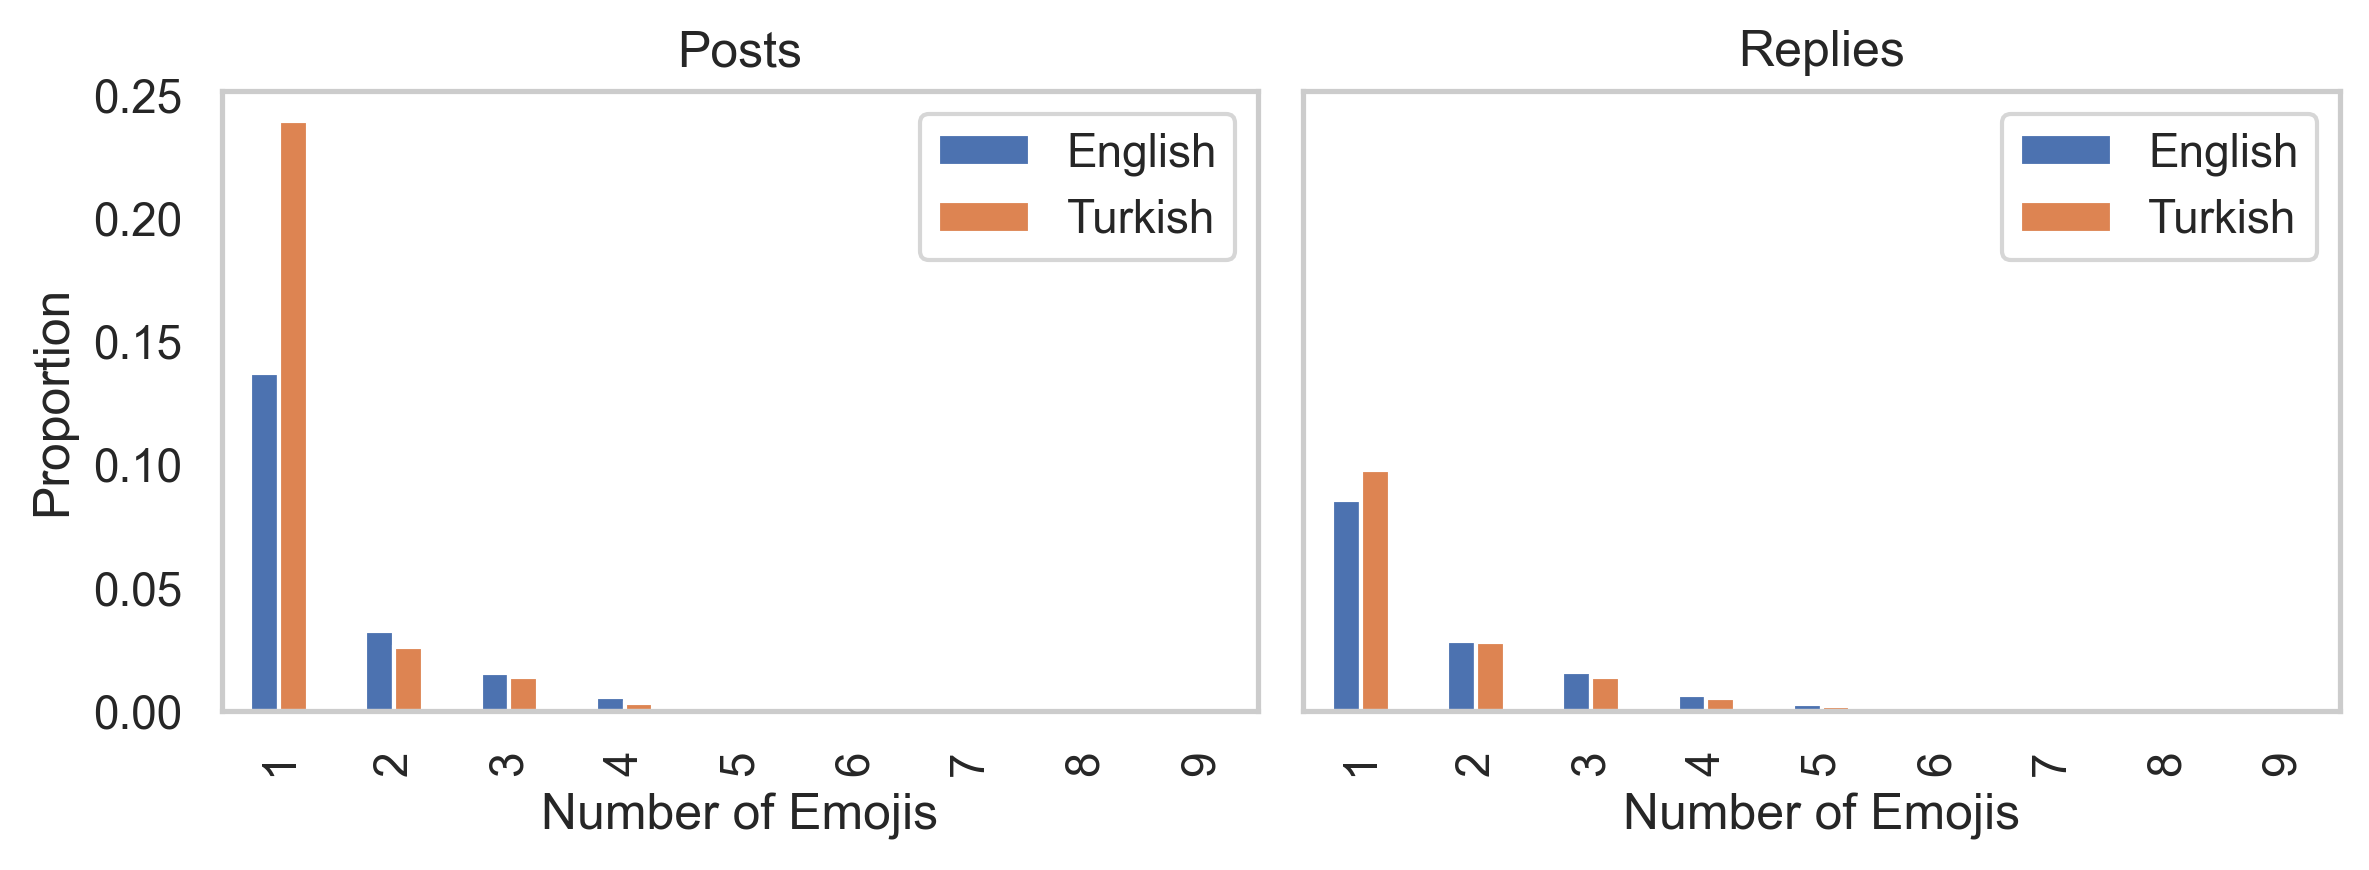

In [57]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,3),sharey=True)
fig.set_dpi(300)
#fig.suptitle('Distribution of Emoji Frequency in Messages')
sns.set_style("whitegrid")
serEnPost = dfEn[(dfEn.type=='post')].emoji_count.value_counts()
serEnPost = serEnPost/serEnPost.sum()

serEnReply = dfEn[(dfEn.type=='reply')].emoji_count.value_counts()
serEnReply = serEnReply/serEnReply.sum()

serTr = dfTr[(dfTr.emoji_count<10)].emoji_count.value_counts()
serTr = serTr/serTr.sum()

serTrPost = dfTr[(dfTr.type=='post')].emoji_count.value_counts()
serTrPost = serTrPost/serTrPost.sum()

serTrReply = dfTr[(dfTr.type=='reply')].emoji_count.value_counts()
serTrReply = serTrReply/serTrReply.sum()



dfToPlotPosts = pd.DataFrame({'English':serEnPost,'Turkish':serTrPost})
dfToPlotPReplies = pd.DataFrame({'English':serEnReply,'Turkish':serTrReply})

dfToPlotPosts[(dfToPlotPosts.index>0) & (dfToPlotPosts.index<10)].plot.bar(ax=ax[0])
ax[0].set_title('Posts')
ax[0].set_ylabel('Proportion')
ax[0].set_xlabel('Number of Emojis')
ax[0].grid(False)

dfToPlotPReplies[(dfToPlotPReplies.index>0) & (dfToPlotPReplies.index<10)].plot.bar(ax=ax[1])
ax[1].set_title('Replies')
ax[1].set_xlabel('Number of Emojis')
ax[1].grid(False)

plt.tight_layout()
plt.ylabel('Proportion')
#plt.xlabel('Number of Emoticons in a Single Tweet')
plt.show()


In [9]:
dfProportions = pd.DataFrame({"trpost":serTrPost,"enpost":serEnPost,"trreply":serTrReply,"enreply":serEnReply})

In [6]:
dfEn.columns

Index(['id', 'created_at', 'company', 'type', 'industry', 'gender',
       'emoji_count', 'contains_emoji'],
      dtype='object')

In [11]:
dfEn.groupby(['industry','company','type'])[['type']].count().pivot_table("type",["reply","post"])

type
industry   company  type         
Automotive bmw      post    24092
                    reply   81596
           hyundai  post     7005
                    reply   40209
           toyota   post    39949
...                           ...
Technology siemens  reply   11961
           sony     post    16152
                    reply  179328
           vodafone post   323429
                    reply  372268

[65 rows x 1 columns]

In [18]:
dfEn.groupby(['industry','type'])[['id']].count()

id
industry                         type          
Automotive                       post     71046
                                 reply   189724
Financial Services and Insurance post      9504
                                 reply    34793
Food & Beverage                  post    268053
                                 reply   263449
Food Service                     post   1359714
                                 reply  1372728
Logistics                        post     60750
                                 reply   193960
Personal Care                    post     43206
                                 reply    75307
Retail                           post    408465
                                 reply   369228
Technology                       post    488136
                                 reply  2892971

In [19]:
pd.pivot_table(dfEn, index=['industry'], columns=['type'], aggfunc=np.count_nonzero)

company          contains_emoji          \
type                                 post    reply           post   reply   
industry                                                                    
Automotive                          71046   189724          10751   33974   
Financial Services and Insurance     9504    34793            589    2148   
Food & Beverage                    268053   263449          82322   36074   
Food Service                      1359714  1372728         172436  239418   
Logistics                           60750   193960           5508   17381   
Personal Care                       43206    75307           6541    6810   
Retail                             408465   369228          47363   63390   
Technology                         488136  2892971         193654  386415   

                                 created_at          emoji_count          \
type                                   post    reply        post   reply   
industry                                                                   
Automotive                            71046   189724       10751   33974   
Financial Services and Insurance       9504    34793         589    2148   
Food & Beverage                      268053   263449       82322   36074   
Food Service                        1359714  1372728      172436  239418   
Logistics                             60750   193960        5508   17381   
Personal Care                         43206    75307        6541    6810   
Retail                               408465   369228       47363   63390   
Technology                           488136  2892971      193654  386415   

                                   gender                id           
type                                 post    reply     post    reply  
industry                                                              
Automotive                          71046   189724    71046   189724  
Financial Services and Insurance     9504    34793     9504    34793  
Food & Beverage                    268053   263449   268053   263449  
Food Service                      1359714  1372728  1359714  1372728  
Logistics                           60750   193960    60750   193960  
Personal Care                       43206    75307    43206    75307  
Retail                             408465   369228   408465   369228  
Technology                         488136  2892971   488136  2892971

In [21]:
pd.pivot_table(dfEn, index=['industry'], columns=['type'], aggfunc=np.count_nonzero).to_excel("/Users/atanaltay/Desktop/dataench2.xlsx")

In [20]:
pd.pivot_table(dfTr, index=['industry'], columns=['type'], aggfunc=np.count_nonzero)

company         contains_emoji         \
type                                post   reply           post  reply   
industry                                                                 
Automotive                          8924   16447            575   2395   
Financial Services and Insurance    8210    9328            820    897   
Food & Beverage                    23260   15417          11115   2856   
Food Service                       18027   18424           2780   2307   
Logistics                           2598   11678            367    754   
Personal Care                      15282    5567           3166   1170   
Retail                             21283   34321           4928   9009   
Technology                        147838  378855          46142  54636   

                                 created_at         emoji_count         \
type                                   post   reply        post  reply   
industry                                                                 
Automotive                             8924   16447         575   2395   
Financial Services and Insurance       8210    9328         820    897   
Food & Beverage                       23260   15417       11115   2856   
Food Service                          18027   18424        2780   2307   
Logistics                              2598   11678         367    754   
Personal Care                         15282    5567        3166   1170   
Retail                                21283   34321        4928   9009   
Technology                           147838  378855       46142  54636   

                                  gender              id          
type                                post   reply    post   reply  
industry                                                          
Automotive                          8924   16447    8924   16447  
Financial Services and Insurance    8210    9328    8210    9328  
Food & Beverage                    23260   15417   23260   15417  
Food Service                       18027   18424   18027   18424  
Logistics                           2598   11678    2598   11678  
Personal Care                      15282    5567   15282    5567  
Retail                             21283   34321   21283   34321  
Technology                        147838  378855  147838  378855

In [22]:
pd.pivot_table(dfTr, index=['industry'], columns=['type'], aggfunc=np.count_nonzero).to_excel("/Users/atanaltay/Desktop/datatrch2.xlsx")

In [32]:
dfEn.emoji_count.describe()

count   8101034.00000
mean          0.28546
std           1.09833
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max         136.00000
Name: emoji_count, dtype: float64

/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='emoji_count', ylabel='Density'>

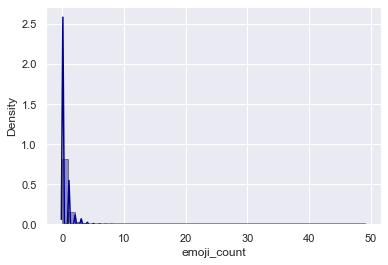

In [29]:
sns.distplot(dfTr[dfTr.emoji_count<50].emoji_count, hist=True, kde=True, 
             bins=50, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             )

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,3),sharey=True)
fig.set_dpi(300)
#fig.suptitle('Distribution of Emoji Frequency in Messages')
sns.set_style('whitegrid')
serEnPost = dfEn[(dfEn.type=='post')].emoji_count.value_counts()
serEnPost = serEnPost/serEnPost.sum()

serEnReply = dfEn[(dfEn.type=='reply')].emoji_count.value_counts()
serEnReply = serEnReply/serEnReply.sum()

#serTr = dfTr[(dfTr.emoji_count<10)].emoji_count.value_counts()
#serTr = serTr/serTr.sum()

serTrPost = dfTr[(dfTr.type=='post')].emoji_count.value_counts()
serTrPost = serTrPost/serTrPost.sum()

serTrReply = dfTr[(dfTr.type=='reply')].emoji_count.value_counts()
serTrReply = serTrReply/serTrReply.sum()



dfToPlotPosts = pd.DataFrame({'English':serEnPost,'Turkish':serTrPost})
dfToPlotPReplies = pd.DataFrame({'English':serEnReply,'Turkish':serTrReply})

dfToPlotPosts[(dfToPlotPosts.index>0) & (dfToPlotPosts.index<10)].plot.bar(ax=ax[0])
ax[0].set_title('Posts')
ax[0].set_ylabel('Probability')
ax[0].set_xlabel('Number of Emojis')
ax[0].grid(axis='x')

dfToPlotPReplies[(dfToPlotPReplies.index>0) & (dfToPlotPReplies.index<10)].plot.bar(ax=ax[1])
ax[1].set_title('Replies')
ax[1].set_xlabel('Number of Emojis')
ax[1].grid(axis='x')

plt.tight_layout()
plt.ylabel('Probability')
#plt.xlabel('Number of Emoticons in a Single Tweet')
plt.show()


##### with zeros

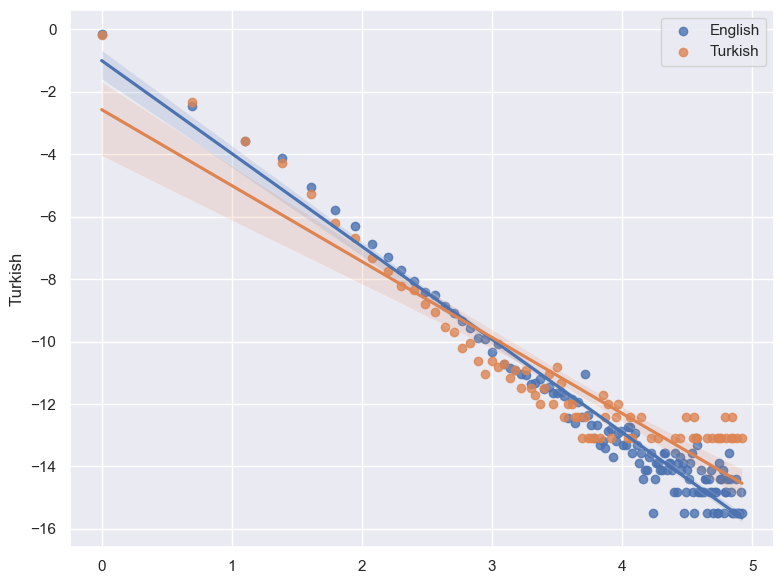

In [9]:
fig,ax = plt.subplots(figsize=(8,6))
fig.set_dpi(100)
sns.regplot(x=np.log(dfToPlotPReplies.index+1),y=np.log(dfToPlotPReplies.English),ax=ax,fit_reg=True,label='English')
sns.regplot(x=np.log(dfToPlotPReplies.index+1),y=np.log(dfToPlotPReplies.Turkish),ax=ax,fit_reg=True,label='Turkish')
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
serEnPost = dfEn[(dfEn.type=='post')].emoji_count.value_counts()
serEnReply = dfEn[(dfEn.type=='reply')].emoji_count.value_counts()


serTrPost = dfTr[(dfTr.type=='post')].emoji_count.value_counts()
serTrReply = dfTr[(dfTr.type=='reply')].emoji_count.value_counts()



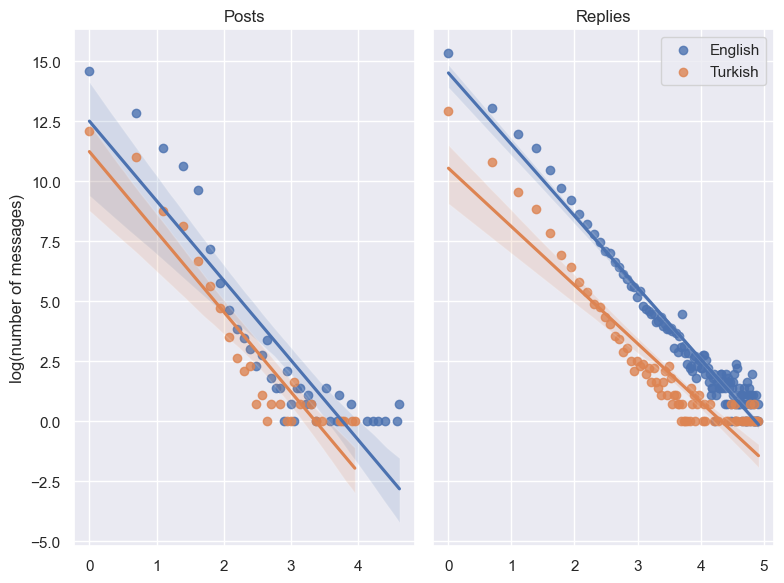

In [19]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,6),sharey=True)
fig.set_dpi(100)
sns.regplot(x=np.log(serEnPost.index+1),y=np.log(serEnPost),ax=ax[0],fit_reg=True,label='English')
sns.regplot(x=np.log(serTrPost.index+1),y=np.log(serTrPost),ax=ax[0],fit_reg=True,label='Turkish')
ax[0].set_title("Posts")
ax[0].set_ylabel("log(number of messages)")
sns.regplot(x=np.log(serEnReply.index+1),y=np.log(serEnReply),ax=ax[1],fit_reg=True,label='English')
sns.regplot(x=np.log(serTrReply.index+1),y=np.log(serTrReply),ax=ax[1],fit_reg=True,label='Turkish')
ax[1].set_ylabel('')
ax[1].set_title("Replies")

plt.legend()
plt.tight_layout()
plt.show()

##### log counts without zeros

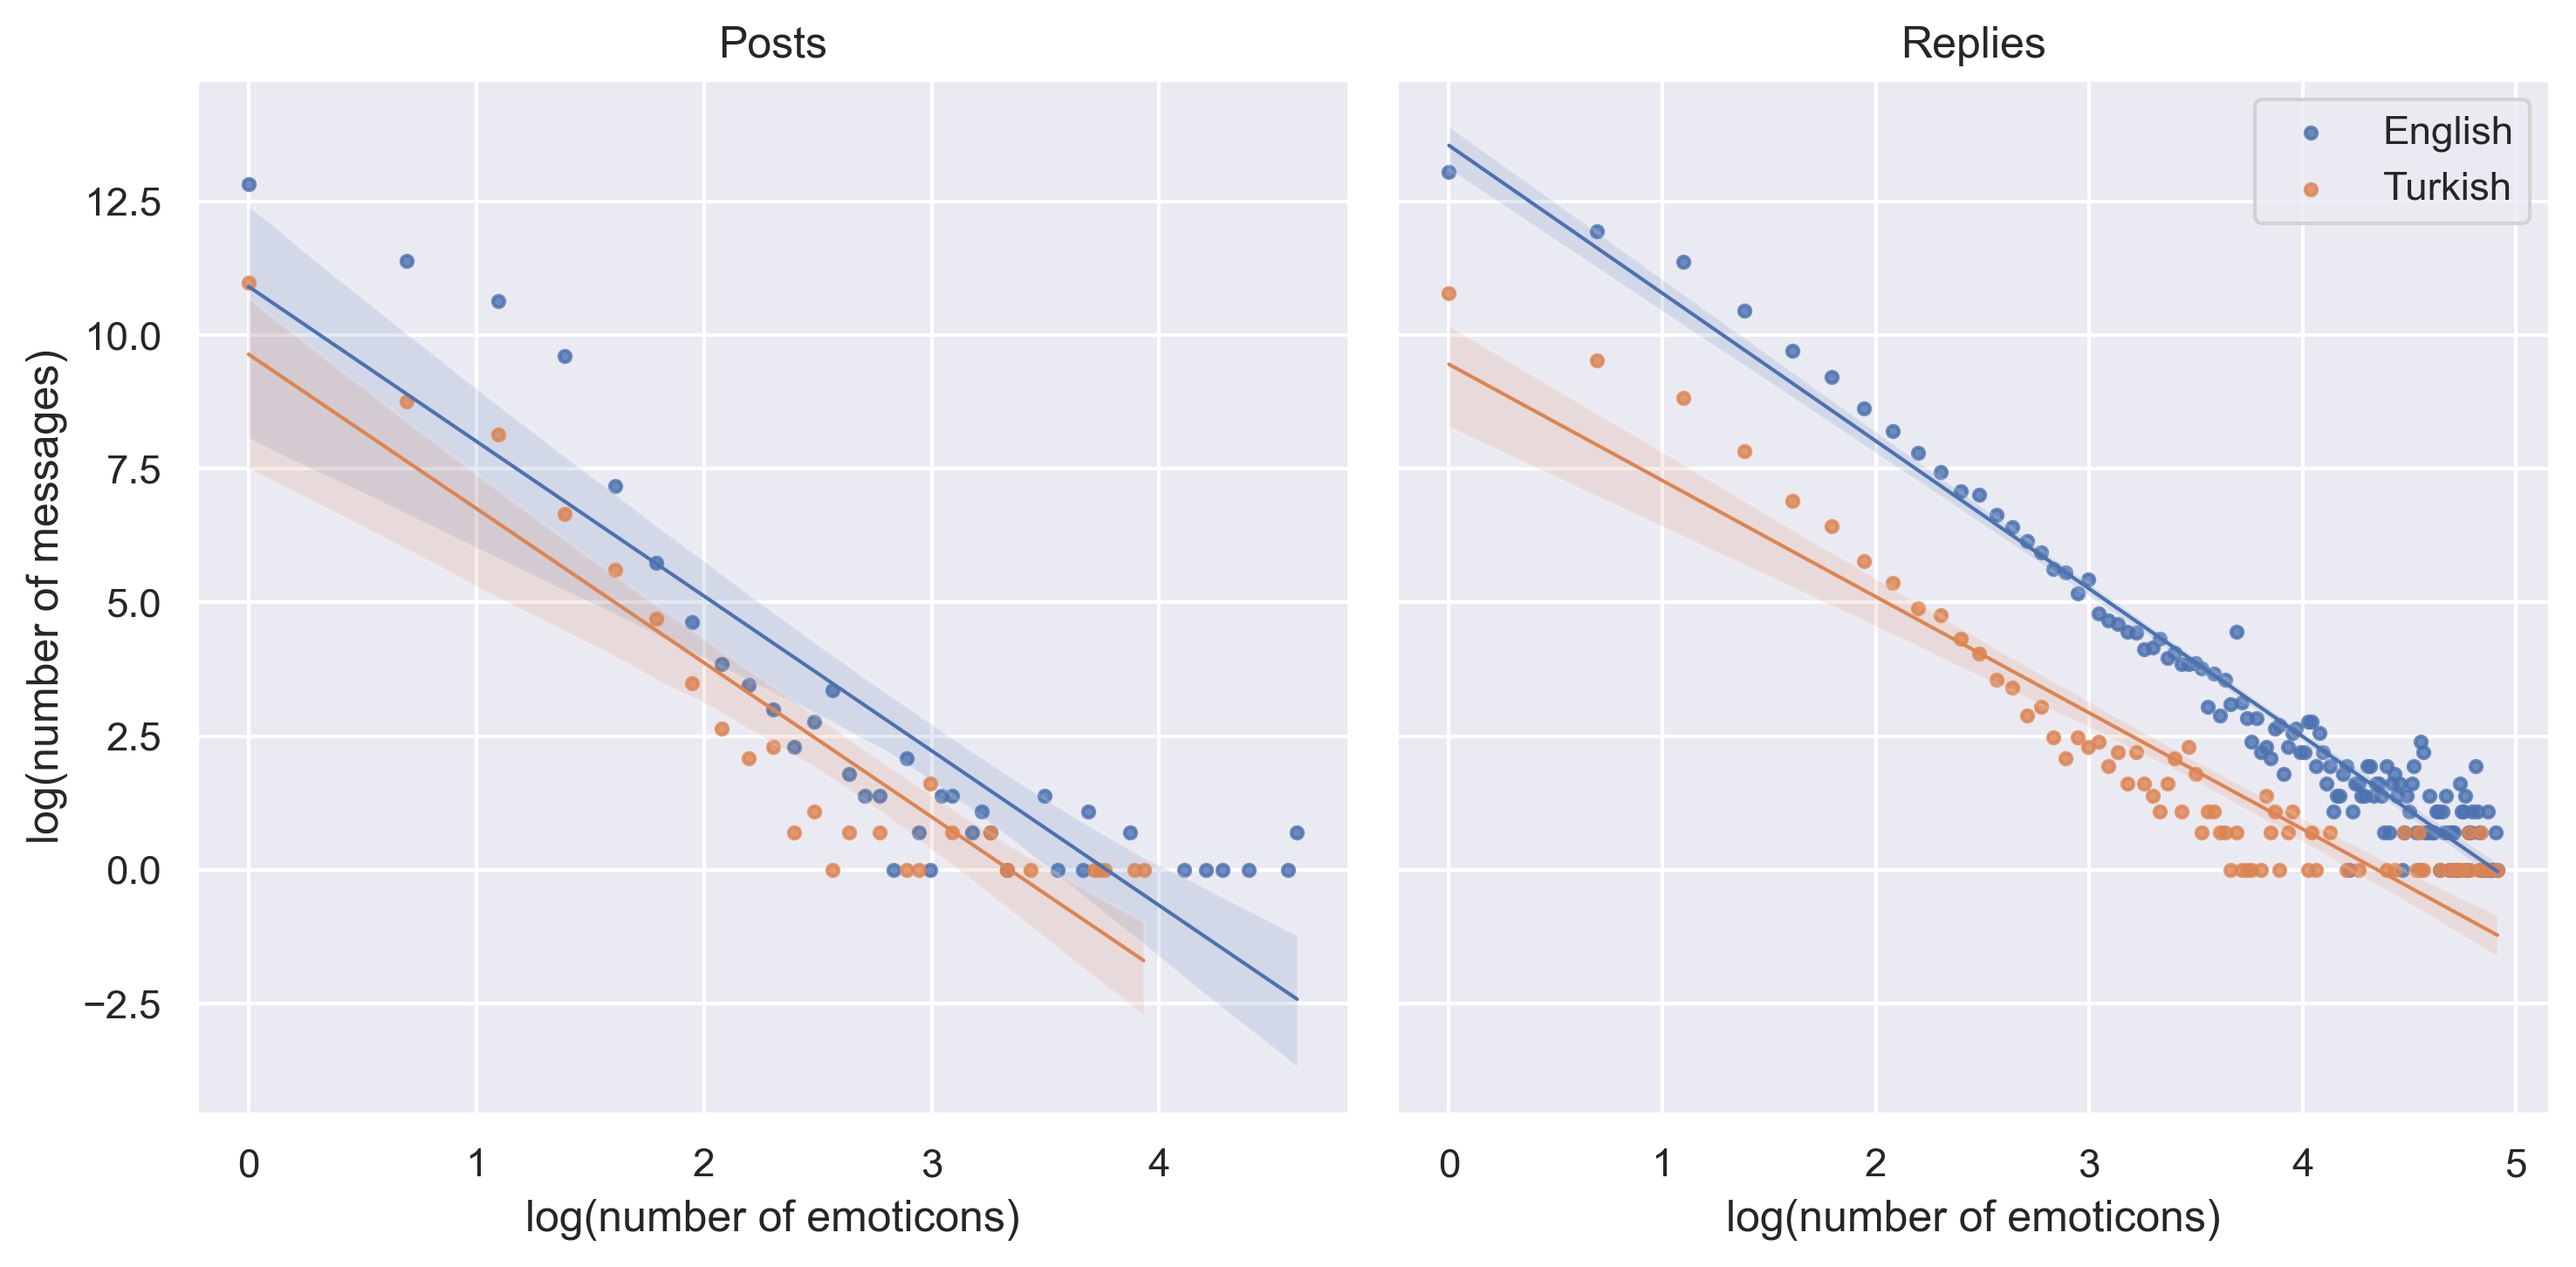

In [73]:
serEnPost = dfEn[(dfEn.type=='post')].emoji_count.value_counts()
serEnReply = dfEn[(dfEn.type=='reply')].emoji_count.value_counts()
serTrPost = dfTr[(dfTr.type=='post')].emoji_count.value_counts()
serTrReply = dfTr[(dfTr.type=='reply')].emoji_count.value_counts()

dfPltTrPost = serTrPost[(serTrPost.index>0)]
dfPltEnPost = serEnPost[(serEnPost.index>0)]

dfPltTrReply = serTrReply[(serTrReply.index>0)]
dfPltEnReply = serEnReply[(serEnReply.index>0)]

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5),sharey=True)
fig.set_dpi(300)
sns.regplot(x=np.log(dfPltEnPost.index),y=np.log(dfPltEnPost),ax=ax[0],fit_reg=True,label='English',scatter_kws={"s": 10},line_kws={"lw":1})
sns.regplot(x=np.log(dfPltTrPost.index),y=np.log(dfPltTrPost),ax=ax[0],fit_reg=True,label='Turkish',scatter_kws={"s": 10},line_kws={"lw":1})
ax[0].set_title("Posts")
ax[0].set_ylabel("log(number of messages)")
ax[0].set_xlabel("log(number of emoticons)")
sns.regplot(x=np.log(dfPltEnReply.index),y=np.log(dfPltEnReply),ax=ax[1],fit_reg=True,label='English',scatter_kws={"s": 10},line_kws={"lw":1})
sns.regplot(x=np.log(dfPltTrReply.index),y=np.log(dfPltTrReply),ax=ax[1],fit_reg=True,label='Turkish',scatter_kws={"s": 10},line_kws={"lw":1})
ax[1].set_ylabel('')
ax[1].set_title("Replies")
ax[1].set_xlabel("log(number of emoticons)")

plt.legend()
plt.tight_layout()
plt.show()

In [5]:
import statsmodels.api as sm

In [48]:
dataTrPost = np.log(serTrPost[(serTrPost.index>0)])
dataEnPost = np.log(serEnPost[(serEnPost.index>0)])

dataTrReply = np.log(serTrReply[(serTrReply.index>0)])
dataEnReply = np.log(serEnReply[(serEnReply.index>0)])

dataTrPost.index = np.log(dataTrPost.index)
dataEnPost.index= np.log(dataEnPost.index)
dataTrReply.index= np.log(dataTrReply.index)
dataEnReply.index= np.log(dataEnReply.index)

dataTrPost = pd.DataFrame({'logmessage':dataTrPost,"logemo":dataTrPost.index,"constant":1})
dataEnPost = pd.DataFrame({'logmessage':dataEnPost,"logemo":dataEnPost.index,"constant":1})
dataTrReply = pd.DataFrame({'logmessage':dataTrReply,"logemo":dataTrReply.index,"constant":1})
dataEnReply = pd.DataFrame({'logmessage':dataEnReply,"logemo":dataEnReply.index,"constant":1})




In [49]:
resPostTr = sm.OLS(dataTrPost.logmessage,exog=dataTrPost[['logemo','constant']]).fit()
resPostEn = sm.OLS(dataEnPost.logmessage,exog=dataEnPost[['logemo','constant']]).fit()
resReplyTr = sm.OLS(dataTrReply.logmessage,exog=dataTrReply[['logemo','constant']]).fit()
resReplyEn = sm.OLS(dataEnReply.logmessage,exog=dataEnReply[['logemo','constant']]).fit()




In [50]:
print(resPostTr.summary())

                            OLS Regression Results                            
Dep. Variable:             logmessage   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     146.9
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           5.79e-12
Time:                        13:44:49   Log-Likelihood:                -42.660
No. Observations:                  27   AIC:                             89.32
Df Residuals:                      25   BIC:                             91.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
logemo        -2.8840      0.238    -12.121      0.0

In [51]:
print(resPostEn.summary())

                            OLS Regression Results                            
Dep. Variable:             logmessage   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     138.7
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           9.91e-14
Time:                        13:44:51   Log-Likelihood:                -68.341
No. Observations:                  37   AIC:                             140.7
Df Residuals:                      35   BIC:                             143.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
logemo        -2.8940      0.246    -11.778      0.0

In [52]:
print(resReplyTr.summary())

                            OLS Regression Results                            
Dep. Variable:             logmessage   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     527.4
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           3.93e-35
Time:                        13:44:53   Log-Likelihood:                -93.890
No. Observations:                  75   AIC:                             191.8
Df Residuals:                      73   BIC:                             196.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
logemo        -2.1730      0.095    -22.965      0.0

In [53]:
print(resReplyEn.summary())

                            OLS Regression Results                            
Dep. Variable:             logmessage   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     2965.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           7.74e-92
Time:                        13:44:55   Log-Likelihood:                -107.96
No. Observations:                 133   AIC:                             219.9
Df Residuals:                     131   BIC:                             225.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
logemo        -2.7635      0.051    -54.448      0.0

##### Testing differecne in coefficients



In [54]:
from scipy.stats import t
def p_val_diff_coef(coef1,coef2,se1,se2,d_f):
    t_stat = (coef1 - coef2)/np.sqrt(np.power(se1,2) + np.power(se2,2))
    return (1 - t.cdf(abs(t_stat), d_f)) * 2
    

In [55]:
p_posts = p_val_diff_coef(resPostEn.params[0],resPostTr.params[0],resPostEn.bse[0],resPostTr.bse[0],18)

p_replies = p_val_diff_coef(resReplyEn.params[0],resReplyTr.params[0],resReplyEn.bse[0],resReplyTr.bse[0],18)



In [57]:
p_replies

3.192720215872136e-05

##### log proportions - probably a better view 

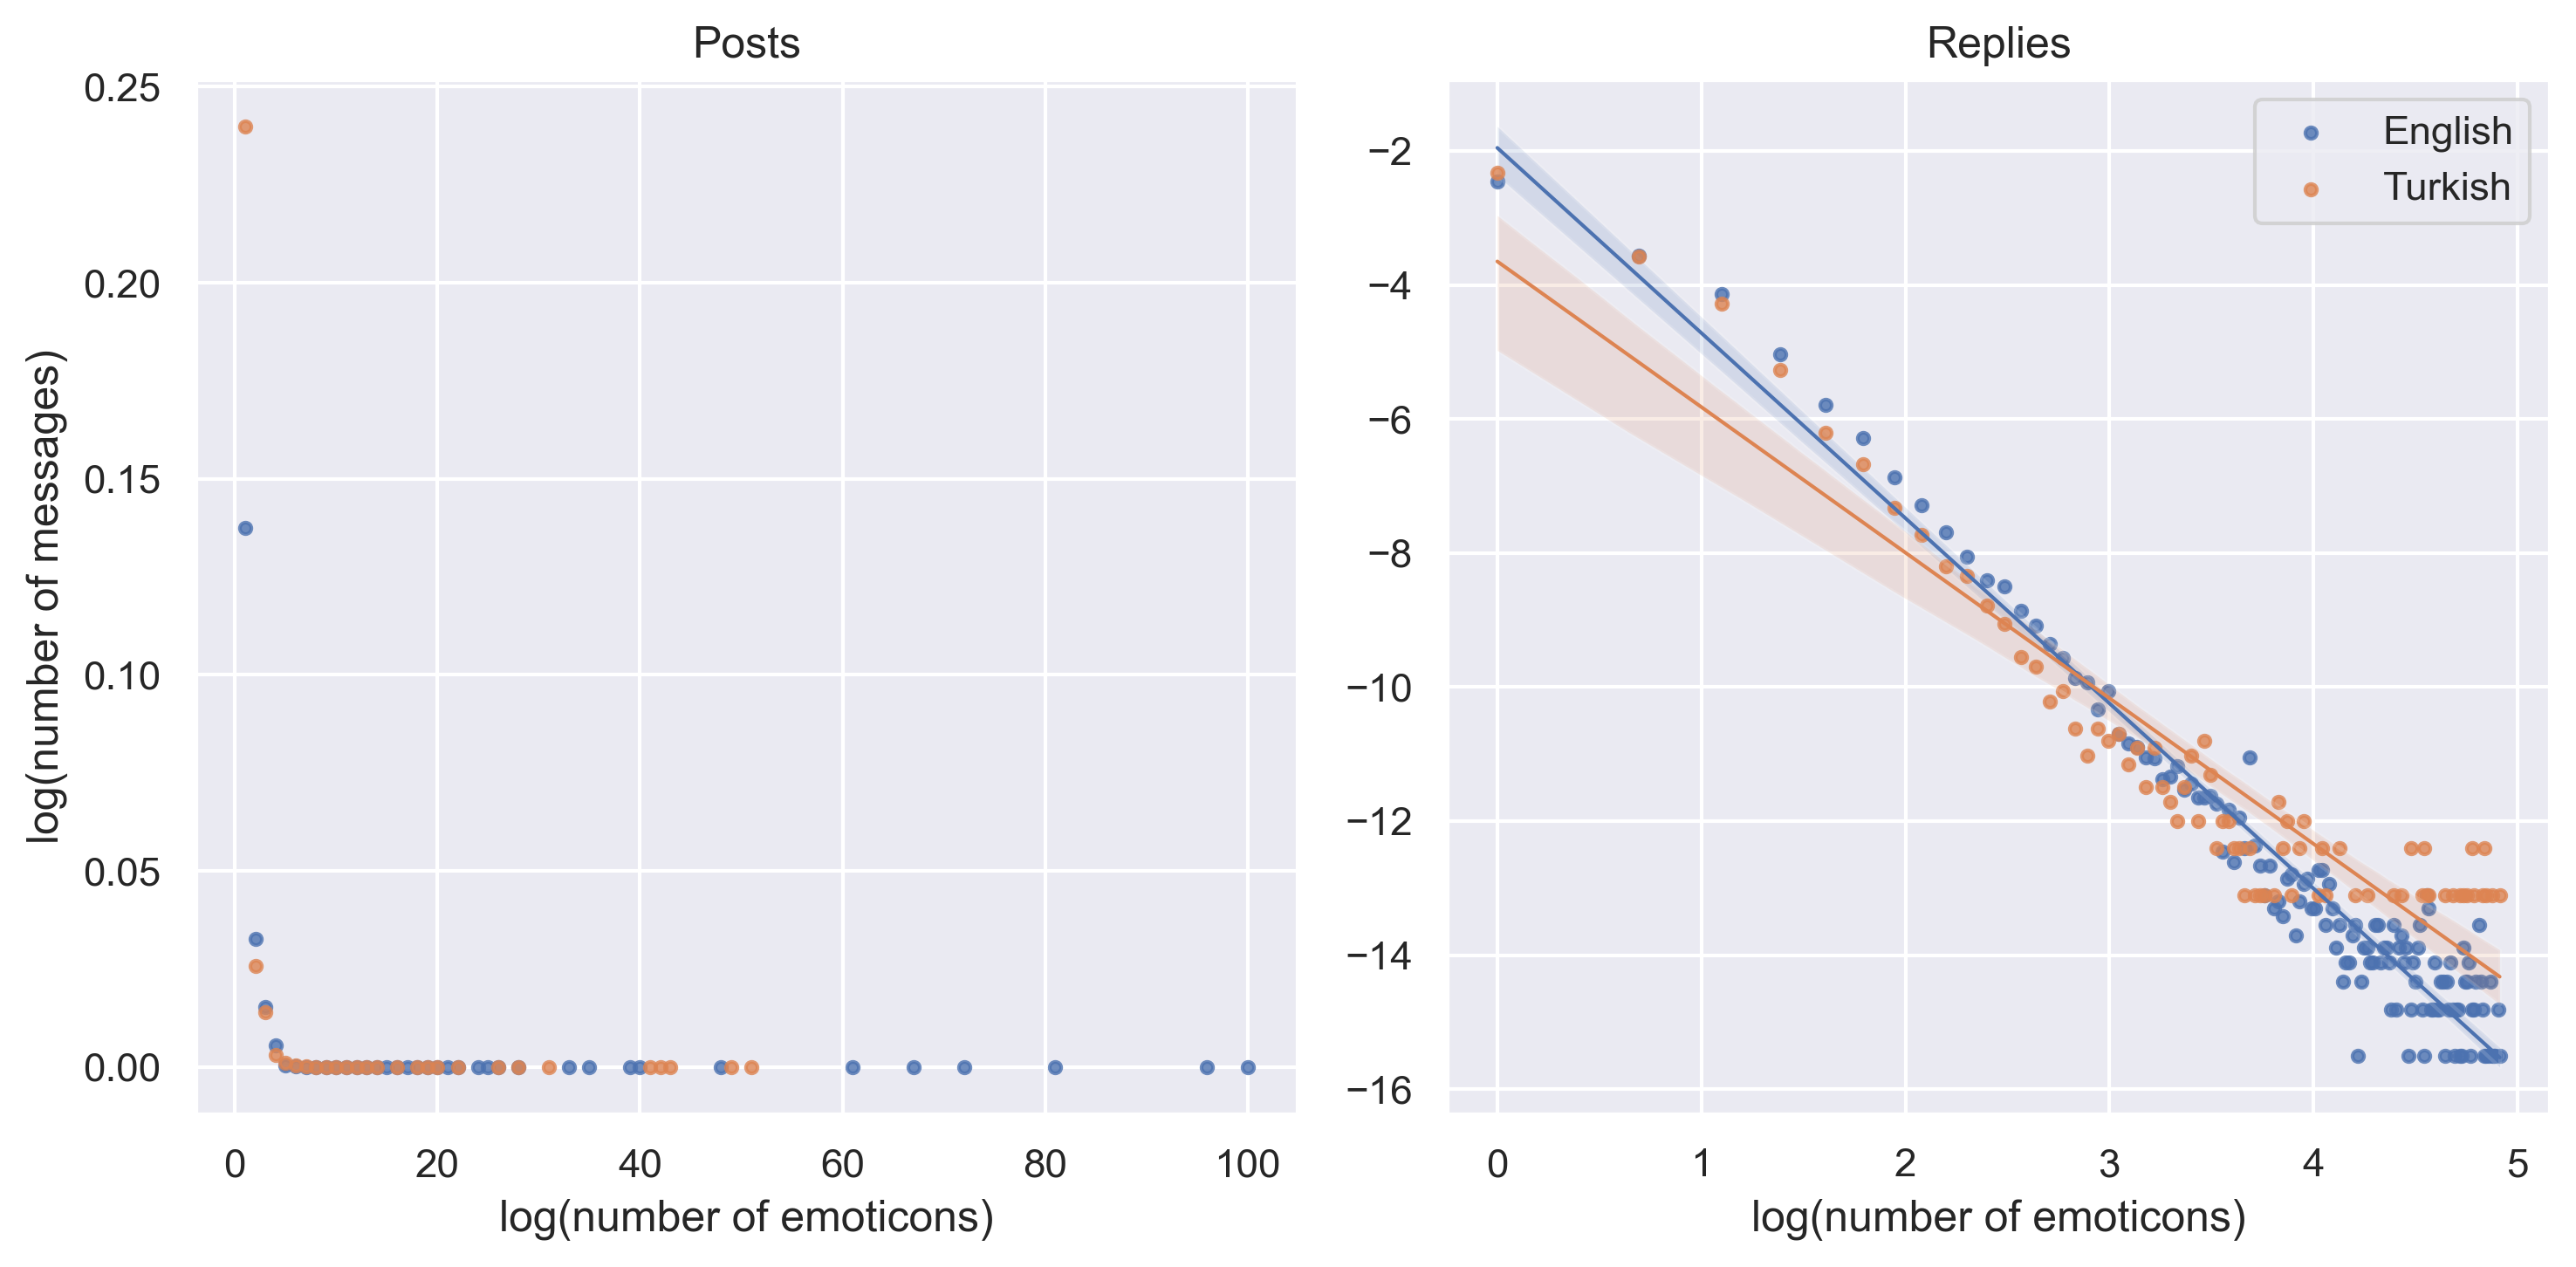

In [77]:
erEnPost = dfEn[(dfEn.type=='post')].emoji_count.value_counts()
serEnPost = serEnPost/serEnPost.sum()

serEnReply = dfEn[(dfEn.type=='reply')].emoji_count.value_counts()
serEnReply = serEnReply/serEnReply.sum()

#serTr = dfTr[(dfTr.emoji_count<10)].emoji_count.value_counts()
#serTr = serTr/serTr.sum()

serTrPost = dfTr[(dfTr.type=='post')].emoji_count.value_counts()
serTrPost = serTrPost/serTrPost.sum()

serTrReply = dfTr[(dfTr.type=='reply')].emoji_count.value_counts()
serTrReply = serTrReply/serTrReply.sum()

dfPltTrPost = serTrPost[(serTrPost.index>0)]
dfPltEnPost = serEnPost[(serEnPost.index>0)]

dfPltTrReply = serTrReply[(serTrReply.index>0)]
dfPltEnReply = serEnReply[(serEnReply.index>0)]

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5),sharey=False)
fig.set_dpi(300)
sns.regplot(x=dfPltEnPost.index,y=dfPltEnPost,ax=ax[0],fit_reg=False,label='English',scatter_kws={"s": 10},line_kws={"lw":1})
sns.regplot(x=dfPltTrPost.index,y=dfPltTrPost,ax=ax[0],fit_reg=False,label='Turkish',scatter_kws={"s": 10},line_kws={"lw":1})
ax[0].set_title("Posts")
ax[0].set_ylabel("log(number of messages)")
ax[0].set_xlabel("log(number of emoticons)")
sns.regplot(x=np.log(dfPltEnReply.index),y=np.log(dfPltEnReply),ax=ax[1],fit_reg=True,label='English',scatter_kws={"s": 10},line_kws={"lw":1})
sns.regplot(x=np.log(dfPltTrReply.index),y=np.log(dfPltTrReply),ax=ax[1],fit_reg=True,label='Turkish',scatter_kws={"s": 10},line_kws={"lw":1})
ax[1].set_ylabel('')
ax[1].set_title("Replies")
ax[1].set_xlabel("log(number of emoticons)")

plt.legend()
plt.tight_layout()
plt.show()

##### T-test for means

In [59]:
dfProcessTr = dfTr[['emoji_count','type']]
dfProcessTr['local'] = 1

dfProcessEn = dfEn[['emoji_count','type']]
dfProcessEn['local'] = 0

dfAll = dfProcessTr.append(dfProcessEn)
dfAll['constant']=np.ones_like(dfAll.emoji_count)
dfAll = dfAll.reset_index()


/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [60]:
from scipy.stats import ttest_ind


stat , pval = ttest_ind(dfAll[(dfAll.type=='post') & (dfAll.local==1)].emoji_count,dfAll[(dfAll.type=='post') & (dfAll.local==0)].emoji_count)

In [61]:
print(stat)


57.322580633472306


In [62]:
print(pval)

0.0


In [63]:
stat , pval = ttest_ind(dfAll[(dfAll.type=='reply') & (dfAll.local==1)].emoji_count,dfAll[(dfAll.type=='reply') & (dfAll.local==0)].emoji_count)

In [64]:
print('stat:',stat,'p:',pval)

stat: -11.525450092001138 p: 9.827246373845004e-31


<AxesSubplot:>

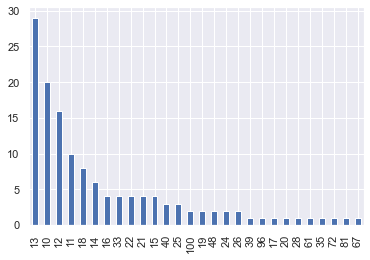

In [14]:
serEnPost[serEnPost.index>=10].plot.bar()

##### without regression

In [6]:
X=np.ones_like(dfTr.emoji_count)
res = sm.NegativeBinomial(dfTr.emoji_count,X).fit(start_params=[1,1])

Optimization terminated successfully.
         Current function value: 0.681805
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13


In [7]:
print(res.summary())

                     NegativeBinomial Regression Results                      
Dep. Variable:            emoji_count   No. Observations:               735459
Model:               NegativeBinomial   Df Residuals:                   735458
Method:                           MLE   Df Model:                            0
Date:                Thu, 24 Mar 2022   Pseudo R-squ.:              -3.632e-10
Time:                        14:36:29   Log-Likelihood:            -5.0144e+05
converged:                       True   LL-Null:                   -5.0144e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2074      0.003   -410.863      0.000      -1.213      -1.202
alpha          3.0070      0.017    175.725      0.000       2.973       3.041


In [9]:
#lambda_start = dfTr.emoji_count.mean()
#excess_zeros = (self.endog == 0).mean() - stats.poisson.pmf(0, lambda_start)
import statsmodels.api as sm
X=np.ones_like(dfTr.emoji_count)
res = sm.Poisson(dfTr.emoji_count,X).fit()

Optimization terminated successfully.
         Current function value: 0.784440
         Iterations 1


In [10]:
print(res.summary())

                          Poisson Regression Results                          
Dep. Variable:            emoji_count   No. Observations:               735459
Model:                        Poisson   Df Residuals:                   735458
Method:                           MLE   Df Model:                            0
Date:                Thu, 24 Mar 2022   Pseudo R-squ.:              -6.661e-16
Time:                        14:41:25   Log-Likelihood:            -5.7692e+05
converged:                       True   LL-Null:                   -5.7692e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2074      0.002   -566.164      0.000      -1.212      -1.203


In [4]:
#lambda_start = dfTr.emoji_count.mean()
#excess_zeros = (self.endog == 0).mean() - stats.poisson.pmf(0, lambda_start)
import statsmodels.api as sm
X=np.ones_like(dfTr.emoji_count)
res = sm.ZeroInflatedPoisson(dfTr.emoji_count,X).fit(start_params=[1,1])

Optimization terminated successfully.
         Current function value: 0.724314
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12


In [5]:
print(res.summary())

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:             emoji_count   No. Observations:               735459
Model:             ZeroInflatedPoisson   Df Residuals:                   735458
Method:                            MLE   Df Model:                            0
Date:                 Thu, 24 Mar 2022   Pseudo R-squ.:              -5.935e-12
Time:                         14:35:01   Log-Likelihood:            -5.3270e+05
converged:                        True   LL-Null:                   -5.3270e+05
Covariance Type:             nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const     0.7268      0.004    207.253      0.000       0.720       0.734
const            -0.0862      0.003    -33.631      0.000      -0.091      -0.081


#### Reshaping data - for regression

In [2]:
dfProcessTr = dfTr[['emoji_count','type']]
dfProcessTr['local'] = 1

dfProcessEn = dfEn[['emoji_count','type']]
dfProcessEn['local'] = 0

dfAll = dfProcessTr.append(dfProcessEn)
dfAll['constant']=np.ones_like(dfAll.emoji_count)
dfAll = dfAll.reset_index()
dfAll.drop(columns=['__null_dask_index__'],inplace=True)

/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [3]:
dfAll

,emoji_count,type,local,constant
0,0,reply,1,1
1,0,reply,1,1
2,1,reply,1,1
3,0,reply,1,1
4,0,reply,1,1
...,...,...,...,...
8836488,0,reply,0,1
8836489,0,reply,0,1
8836490,0,reply,0,1
8836491,0,reply,0,1


#### Testing models

##### Linear Regression

In [4]:
import statsmodels.api as sm

In [ ]:
#POSTS
#Linear Regression
dataPosts = dfAll[dfAll.type=='post']
regFit = sm.OLS(dataPosts.emoji_count,dataPosts[['local','constant']]).fit()

In [18]:
print(regFit.summary())

                            OLS Regression Results                            
Dep. Variable:            emoji_count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3286.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:23:06   Log-Likelihood:            -3.1017e+06
No. Observations:             2954296   AIC:                         6.203e+06
Df Residuals:                 2954294   BIC:                         6.204e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
local          0.0835      0.001     57.323      0.0

In [19]:
# REPLIES
#Linear Regression
dataPosts = dfAll[dfAll.type=='reply']
regFitReplies = sm.OLS(dataPosts.emoji_count,dataPosts[['local','constant']]).fit()

In [20]:
print(regFitReplies.summary())

                            OLS Regression Results                            
Dep. Variable:            emoji_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     132.8
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           9.83e-31
Time:                        11:24:58   Log-Likelihood:            -9.6757e+06
No. Observations:             5882197   AIC:                         1.935e+07
Df Residuals:                 5882195   BIC:                         1.935e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
local         -0.0216      0.002    -11.525      0.0

In [21]:

#Posts Poisson

dataPosts = dfAll[dfAll.type=='post']
regFit = sm.Poisson(dataPosts.emoji_count,dataPosts[['local','constant']]).fit()

Optimization terminated successfully.
         Current function value: 0.712412
         Iterations 5


In [22]:
print(regFit.summary())

                          Poisson Regression Results                          
Dep. Variable:            emoji_count   No. Observations:              2954296
Model:                        Poisson   Df Residuals:                  2954294
Method:                           MLE   Df Model:                            1
Date:                Wed, 06 Apr 2022   Pseudo R-squ.:                0.001223
Time:                        14:26:41   Log-Likelihood:            -2.1047e+06
converged:                       True   LL-Null:                   -2.1073e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
local          0.2648      0.004     74.342      0.000       0.258       0.272
constant      -1.2887      0.001  -1113.560      0.000      -1.291      -1.286


In [23]:
regFit.bic

4209379.174033819

In [24]:
#Replies

dataReplies = dfAll[dfAll.type=='reply']
regFitRep = sm.Poisson(dataReplies.emoji_count,dataReplies[['local','constant']]).fit()
print(regFitRep.summary())
print(regFitRep.bic)

Optimization terminated successfully.
         Current function value: 0.829848
         Iterations 4
                          Poisson Regression Results                          
Dep. Variable:            emoji_count   No. Observations:              5882197
Model:                        Poisson   Df Residuals:                  5882195
Method:                           MLE   Df Model:                            1
Date:                Wed, 06 Apr 2022   Pseudo R-squ.:               7.567e-05
Time:                        14:29:59   Log-Likelihood:            -4.8813e+06
converged:                       True   LL-Null:                   -4.8817e+06
Covariance Type:            nonrobust   LLR p-value:                1.094e-162
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
local         -0.0771      0.003    -26.887      0.000      -0.083      -0.072
constant      -1.2365      0.

In [25]:
#POSTS
#Negative Binomial

dataPosts = dfAll[dfAll.type=='post']

negFit  = sm.NegativeBinomial(dataPosts.emoji_count,dataPosts[['local','constant']]).fit()

Optimization terminated successfully.
         Current function value: 0.669729
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8


In [26]:
print(negFit.summary())

                     NegativeBinomial Regression Results                      
Dep. Variable:            emoji_count   No. Observations:              2954296
Model:               NegativeBinomial   Df Residuals:                  2954294
Method:                           MLE   Df Model:                            1
Date:                Wed, 06 Apr 2022   Pseudo R-squ.:               0.0007948
Time:                        14:46:40   Log-Likelihood:            -1.9786e+06
converged:                       True   LL-Null:                   -1.9802e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
local          0.2648      0.005     56.487      0.000       0.256       0.274
constant      -1.2887      0.001   -887.033      0.000      -1.292      -1.286
alpha          2.0897      0.007    290.268      0.0

In [27]:
negFit.bic

3957201.384517663

In [28]:
#REPLIES
#Negative Binomial
dataReplies = dfAll[dfAll.type=='reply']

negRepFit  = sm.NegativeBinomial(dataReplies.emoji_count,dataReplies[['local','constant']]).fit()

print(negRepFit.summary())
print(negRepFit.bic)


Optimization terminated successfully.
         Current function value: 0.609593
         Iterations: 5
         Function evaluations: 10
         Gradient evaluations: 10
                     NegativeBinomial Regression Results                      
Dep. Variable:            emoji_count   No. Observations:              5882197
Model:               NegativeBinomial   Df Residuals:                  5882195
Method:                           MLE   Df Model:                            1
Date:                Wed, 06 Apr 2022   Pseudo R-squ.:               3.422e-05
Time:                        15:04:03   Log-Likelihood:            -3.5857e+06
converged:                       True   LL-Null:                   -3.5859e+06
Covariance Type:            nonrobust   LLR p-value:                 2.585e-55
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
local         -0.0771      0.005    -15

In [29]:
#ZERO INFLATED POISSON
#POSTS

dataPosts = dfAll[dfAll.type=='post']

zipFit = sm.ZeroInflatedPoisson(dataPosts.emoji_count,dataPosts[['local','constant']],exog_infl=dataPosts[['local','constant']]).fit()

print(zipFit.summary())
print(zipFit.bic)


/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.673795
         Iterations: 28
         Function evaluations: 31
         Gradient evaluations: 31
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:             emoji_count   No. Observations:              2954296
Model:             ZeroInflatedPoisson   Df Residuals:                  2954294
Method:                            MLE   Df Model:                            1
Date:                 Wed, 06 Apr 2022   Pseudo R-squ.:                0.004013
Time:                         15:52:23   Log-Likelihood:            -1.9906e+06
converged:                        True   LL-Null:                   -1.9986e+06
Covariance Type:             nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_local     

In [32]:
#ZERO INFLATED POISSON
#REPLIES

dataReplies = dfAll[dfAll.type=='reply']

zipFitRep = sm.ZeroInflatedPoisson(dataReplies.emoji_count,dataReplies[['local','constant']],exog_infl=dataReplies[['local','constant']]).fit()

print(zipFitRep.summary())
print(zipFitRep.bic)


/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.663534
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:             emoji_count   No. Observations:              5882197
Model:             ZeroInflatedPoisson   Df Residuals:                  5882195
Method:                            MLE   Df Model:                            1
Date:                 Wed, 06 Apr 2022   Pseudo R-squ.:               0.0003799
Time:                         15:59:00   Log-Likelihood:            -3.9030e+06
converged:                        True   LL-Null:                   -3.9045e+06
Covariance Type:             nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_local     

In [5]:
#Negative Binomial Posts
# I had to sample all the data and increase number of iterations for the MLE to converge

dataPosts = dfAll[dfAll.type=='post']
#sampEn = dataPosts[dataPosts.local==0].sample(frac=0.1,random_state=42)
#dataPosts = dataPosts[dataPosts.local==1].append(sampEn).sample(frac=0.20,random_state=42)
zinbFitPost2 = sm.ZeroInflatedNegativeBinomialP(dataPosts.emoji_count,dataPosts[['local','constant']],exog_infl=dataPosts[['local','constant']]).fit(maxiter=100)

#print(zinbFitPost2.summary())
#print(zinbFitPost2.bic)

Optimization terminated successfully.
         Current function value: 0.668581
         Iterations: 52
         Function evaluations: 55
         Gradient evaluations: 55


In [6]:
print(zinbFitPost2.summary())

/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3122: RuntimeWarning: invalid value encountered in log
  a1 * np.log(a1) + y * np.log(mu) -
/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3123: RuntimeWarning: invalid value encountered in log
  (y + a1) * np.log(a2))


                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                       emoji_count   No. Observations:              2954296
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                  2954294
Method:                                      MLE   Df Model:                            1
Date:                           Wed, 16 Nov 2022   Pseudo R-squ.:                0.002509
Time:                                   16:56:07   Log-Likelihood:            -1.9752e+06
converged:                                  True   LL-Null:                   -1.9802e+06
Covariance Type:                       nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_local       -9.8977      2.224     -4.450      0.000     -14.257      -5.539
inflate_constant    -0.51

In [7]:
print(zinbFitPost2.bic)

3950399.5646928838


In [8]:
#Negative Binomial Replies
# I had to sample all the data and increase number of iterations for the MLE to converge

dataReplies = dfAll[dfAll.type=='reply']
#samp = dataReplies[dataReplies.local==0].sample(frac=0.1,random_state=42)
#dataReplies = dataReplies[dataReplies.local==1].append(samp).sample(frac=0.20,random_state=42)
zinbFitReply2 = sm.ZeroInflatedNegativeBinomialP(dataReplies.emoji_count,dataReplies[['local','constant']],exog_infl=dataReplies[['local','constant']]).fit(maxiter=100)

#print(zinbFitPost2.summary())
#print(zinbFitPost2.bic)

Optimization terminated successfully.
         Current function value: 0.609593
         Iterations: 51
         Function evaluations: 53
         Gradient evaluations: 53


In [9]:
print(zinbFitReply2.summary())

/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:593: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:593: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                       emoji_count   No. Observations:              5882197
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                  5882195
Method:                                      MLE   Df Model:                            1
Date:                           Wed, 16 Nov 2022   Pseudo R-squ.:               3.413e-05
Time:                                   17:19:20   Log-Likelihood:            -3.5857e+06
converged:                                  True   LL-Null:                   -3.5859e+06
Covariance Type:                       nonrobust   LLR p-value:                 3.604e-55
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_local       -1.9131      5.077     -0.377      0.706     -11.863       8.037
inflate_constant    -8.01

In [10]:
zinbFitReply2.bic

7171528.836448799